In [1]:
# 무작위로 k개의 클러스터 중심 정함
# 각 샘플에서 가장 가까운 클러스터 중심 찾아 해당 클러스터 샘플 지정
# 클러스터 속한 샘플 평균값으로 클러스터 중심 변경
# 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복

In [2]:
# 이미지 numpy 슬라이싱 이해가 안됨

In [3]:
import numpy as np
fruits = np.load('fruits_300.npy')
# 샘플개수, 너비, 높이 3차원 배열

In [4]:
len(fruits)

300

In [5]:
fruits_2d = fruits.reshape(-1, 100*100)
# 2차원 배열로 변경
# 100, 100 각 2차원을 10000개로 1차원으로 만듬

In [6]:
len(fruits_2d)

300

In [7]:
len(fruits_2d[0])

10000

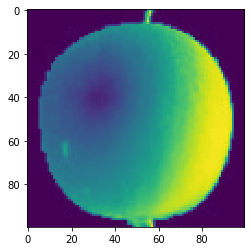

In [10]:
plt.figure()
plt.imshow(fruits[0])#사과
plt.show()

In [11]:
# 클러스터 갯수 3으로 지정
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [12]:
# 군집 결과는 Kmeans 클래스 객체의 labels_속성에 저장, labels_배열의 길이는 샘플 개수와 같음
# 각 샘플이 어떤 레이블에 해당되는지 나타냄
# n_clusters=3으로 지정했기 때문에 labels_배열의 값은 0,1,2중 하나(순서의 의미x, 사과, 파인애플, 바나나 중 하나)
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# 각각 모은 샘플 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))

In [14]:
# 각 클러스터 어떤 이미지 나타내는지 그림으로 출력
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)#n은 샘플 개수
#     한 줄에 10개씩 이미지 그리기, 샘플 개수를 10으로 나누어 전체 행 개수 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수, 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                           figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:#n개까지만 그리기
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

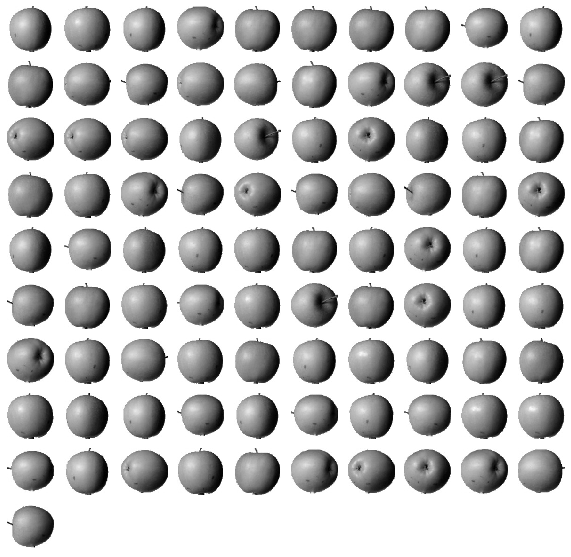

In [15]:
# lebels0클러스터링 91개 이미지 모두 출력
draw_fruits(fruits[km.labels_==0])

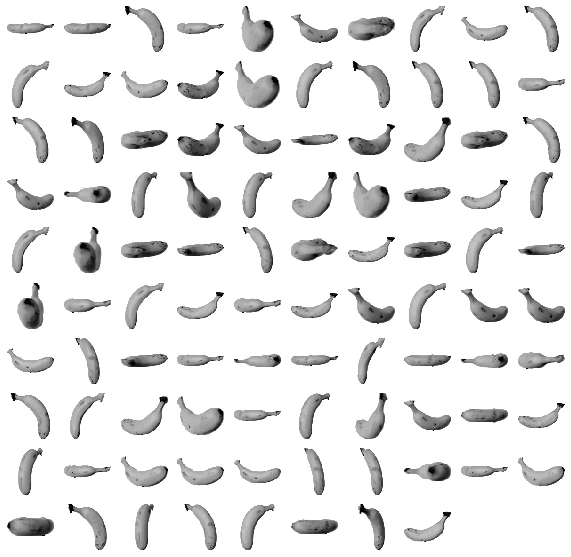

In [16]:
draw_fruits(fruits[km.labels_==1])

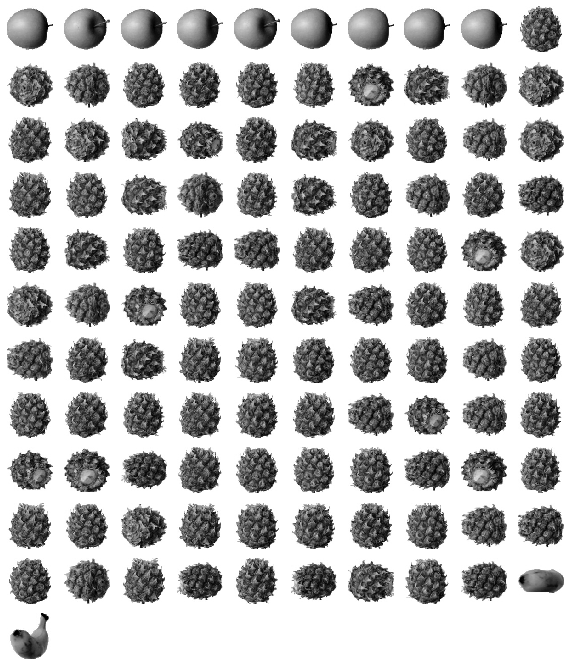

In [17]:
draw_fruits(fruits[km.labels_==2])
# 사과랑 바나나 섞여 있음
# 완벽 구별 x, 훈련 데이터에 타깃 레이블을 제공하지 않았지만 비슷한 샘플들을 잘 모음

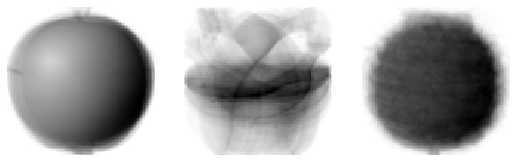

In [18]:
# 클러스터 중심은 cluster_centers_ 속성에 저장, fruits_2d 샘플의 클러스터 중심으로 
# 이미지 출력시 100x100 크기 2차원 배열로 바꿈
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [19]:
print(km.transform(fruits_2d[100:101]))
# transform은 StandardScaler 클래스처럼 특성값 변환 도구로 사용 
# fruits_2d[100]으로 쓰면 (10000,) zmrl qoduffh dpfj qkftod, (1, 10000)크기 배열 전달

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [20]:
km.predict(fruits_2d[100:101])
# 레이블 2 파인애플로 예측

array([2])

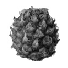

In [23]:
draw_fruits(fruits[100:101])
# 파인애플 맞음

In [24]:
# 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는데 반복 횟수는?
km.n_iter_

3

In [ ]:
# 클러스터 중심을 특성 공학처럼 사용해 데이터셋을 저차원(이경우 10,000에서 3으로 줄임)으로 변환할 수 있음
# 또는 가까운 거리에 있는 클러스터 중심을 샘플의 예측값으로 사용할 수 있음
# n_clusters를 3으로 지정한건 타깃에 대한 정보를 미리 알았기 때문, 실전이었으면 클러스터 갯수조차 알 수 없음

In [25]:
# 최적의 k찾기(완벽한 방법은 x, 각 도구마당 장단점 있음)
# 엘보우 방법
# k-means는 클러스터 중심과 클러스터 속한 샘플 사이 거리 잴 수 있음->거리의 제곱합을 이너셔라고 함
# 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 값으로 생각할 수 있음
# 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어듬
# 엘보우는 즉 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 개수를 찾는 방법
# 클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있음
# 이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않음
# 즉, 이너셔가 줄어들지 않음, 이 지점이 팔꿈치 모양이어서 엘보우 방법이라 부름

In [26]:
# k-means클래스는 자동으로 이너셔를 계산해서 inertia_속성으로 제공
# 다음 코드에서 클러스터 개수를 k를 2~6까지 바꿔가며 K-means 클래스를 5번 훈련
# fit()메서드로 훈련 후 inertia_속성에 저장된 이너셔 값을 inertia 리스트에 추가, 저장된 값을 그래프로 출력

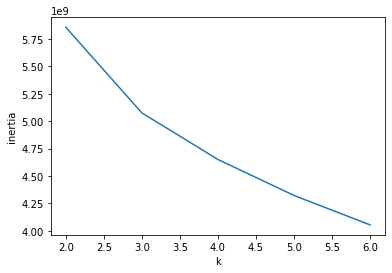

In [27]:
inertia=[]
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [ ]:
# k=3에서 그래프 기울기가 꺾이는 걸 알 수 있음